In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.applications import MobileNetV2
from PIL import Image
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import mixed_precision

In [2]:
train_images = ImageDataGenerator(rescale = 1./255,validation_split=0.1,fill_mode='nearest')
test_images = ImageDataGenerator(rescale = 1./255)
training_set = train_images.flow_from_directory('data/Train',target_size = (32, 32),batch_size=64,subset='training',class_mode = 'categorical',color_mode='grayscale',shuffle=True)
validation_set = train_images.flow_from_directory('data/Train',target_size = (32, 32),batch_size=64,subset='validation',class_mode = 'categorical',color_mode='grayscale',shuffle=True)
test_set = test_images.flow_from_directory('data/Test',target_size = (32, 32),batch_size=1,class_mode = 'categorical',color_mode='grayscale',shuffle=True)

Found 70380 images belonging to 46 classes.
Found 7820 images belonging to 46 classes.
Found 13800 images belonging to 46 classes.


In [3]:
model = models.Sequential()
model.add(layers.GaussianNoise(0.1, input_shape=(32, 32,1)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0001), bias_regularizer=tf.keras.regularizers.l2(0.0001)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.BatchNormalization())
model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0001), bias_regularizer=tf.keras.regularizers.l2(0.0001)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.BatchNormalization())
model.add(layers.Conv2D(256, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0001), bias_regularizer=tf.keras.regularizers.l2(0.0001)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.BatchNormalization())
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0001), bias_regularizer=tf.keras.regularizers.l2(0.0001)))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0001), bias_regularizer=tf.keras.regularizers.l2(0.0001)))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0001), bias_regularizer=tf.keras.regularizers.l2(0.0001)))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(46,activation='softmax'))

In [4]:
#model = MobileNetV2(input_shape=(32,32,3),weights=None)
model.compile(optimizer=tf.keras.optimizers.Adam(0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [5]:
import datetime
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)


In [6]:
history = model.fit(training_set,validation_data=validation_set,epochs=20,callbacks=[tensorboard_callback])

Epoch 1/20
1100/1100 [==============================] - 51s 42ms/step - loss: 1.1474 - accuracy: 0.8342 - val_loss: 0.9854 - val_accuracy: 0.8505
Epoch 2/20
1100/1100 [==============================] - 26s 23ms/step - loss: 0.5673 - accuracy: 0.9500 - val_loss: 0.9080 - val_accuracy: 0.8425
Epoch 3/20
1100/1100 [==============================] - 26s 24ms/step - loss: 0.4649 - accuracy: 0.9590 - val_loss: 0.7896 - val_accuracy: 0.8699
Epoch 4/20
1100/1100 [==============================] - 26s 23ms/step - loss: 0.4360 - accuracy: 0.9626 - val_loss: 0.6728 - val_accuracy: 0.8981
Epoch 5/20
1100/1100 [==============================] - 26s 24ms/step - loss: 0.4250 - accuracy: 0.9646 - val_loss: 0.6842 - val_accuracy: 0.8895
Epoch 6/20
1100/1100 [==============================] - 26s 24ms/step - loss: 0.4062 - accuracy: 0.9670 - val_loss: 0.7480 - val_accuracy: 0.8740
Epoch 7/20
1100/1100 [==============================] - 26s 24ms/step - loss: 0.3991 - accuracy: 0.9678 - val_loss: 0.7514 -

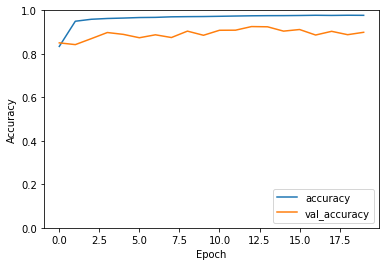

In [7]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

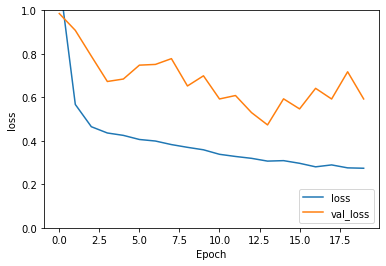

In [8]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.ylim([0, 1])
plt.legend(loc='lower right')

In [9]:
test_loss, test_acc = model.evaluate(test_set)

13800/13800 [==============================] - 55s 4ms/step - loss: 0.3180 - accuracy: 0.9663


In [10]:
model.save('model.h5')